In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from tqdm import tqdm

import pickle

# this code is available on GitHub: github.com/BDNYC/Doublet_Quantifier
from doublet_quantifier.models import *
from doublet_quantifier.curvefit import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/' # path to this directory 
sys.path.append(mypath)

from functions.plotting_tools import *
from functions.data_tools import *

# opening pseudo-voigt parameter DataFrame
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
dfs = []
temps = [900, 1000, 1100, 1200]

for temp in temps:
    with open(mypath + "diamondback-data/pickle_files/parameters/t"+ str(temp) + "_parameter_df.pkl", "rb") as f:
        df = pickle.load(f)
        df["temp"] = temp * np.ones(len(df))
        dfs.append(df[df['clouds'] != 10].copy(deep=False).reset_index(drop=True))

master_df = pd.concat(dfs, ignore_index=True)
[T900, T1000, T1100, T1200] = dfs

del df

In [6]:
fsed_num = [1, 2, 3, 4, 8]
fsed_ticks = ["\n Cloudier", '2', '3', '4', 'Less \nCloudy\n 8']

In [14]:
T1000[round(T1000['logg']) ==  4]


,nu1,nu2,A1,A2,FWHM1,FWHM2,μ1,μ2,name,gravity,logg,clouds,temp
4,5.119784e-20,7.804302e-20,-9.526898e+09,-1.341173e+10,0.002716,0.001226,1.168889,1.177432,100 f8,100,4.000000,8,1000.0
6,5.000000e-13,2.673764e-11,-6.374496e+09,-1.036136e+10,0.003496,0.000872,1.168691,1.177486,100 f4,100,4.000000,4,1000.0
7,4.057926e-01,1.000000e+00,-3.752644e+08,-3.899063e+08,0.012700,0.000515,1.158901,1.177614,100 f1,100,4.000000,1,1000.0
8,9.684379e-20,7.441870e-19,-1.798504e+09,-3.185444e+09,0.005101,0.000649,1.168076,1.177545,100 f2,100,4.000000,2,1000.0
9,4.176825e-01,1.000000e+00,-1.819390e+09,-1.846635e+09,0.010997,0.000530,1.162004,1.177590,100 f3,100,4.000000,3,1000.0
10,8.155340e-20,1.948798e-19,-5.153438e+09,-8.677657e+09,0.004034,0.000748,1.168558,1.177542,316 f4,316,4.499687,4,1000.0
11,1.564651e-11,8.236885e-01,-3.253921e+08,-6.136272e+08,0.006929,0.000536,1.166428,1.177597,316 f1,316,4.499687,1,1000.0
12,6.507431e-20,1.127613e-19,-3.854802e+09,-6.306201e+09,0.003740,0.000815,1.168661,1.177541,316 f3,316,4.499687,3,1000.0
14,6.013704e-01,1.000000e+00,-8.751068e+08,-7.329540e+08,0.011517,0.000504,1.159909,1.177626,316 f2,316,4.499687,2,1000.0
22,6.327561e-20,1.001212e-19,-1.048896e+10,-1.479319e+10,0.003072,0.001235,1.168849,1.177472,316 f8,316,4.499687,8,1000.0


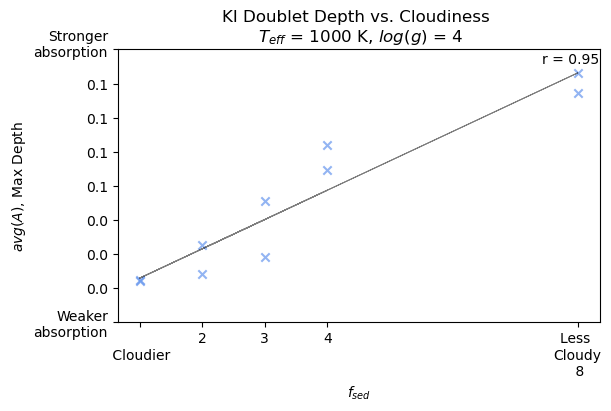

In [29]:
fig = plt.figure(figsize=(6, 4), constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])
parameter_df = T1000[round(T1000['logg']) ==  4]
parameter_df = parameter_df[parameter_df['clouds'] < 9]

fsed = parameter_df.clouds
parameter = -(parameter_df.A1 + parameter_df.A2)/2
logg = parameter_df.logg
logg_values = list(set(logg))

# plotting each point individually to assign the correct color
ax.scatter(fsed, parameter, color='cornflowerblue', marker='x', alpha=0.7)
    
# creating line on the second plot
m, b = np.polyfit(fsed, parameter, 1)
ax.plot(fsed, fsed*m + b, color='k',
            linewidth=.7, alpha=0.5, label=f'{m:.2}x + {b:.2}')
# writing pearson r value of the line at the top of each graph
r2 = stats.pearsonr(fsed, parameter)[0]
ax.annotate(f"r = {r2:.2}", xy=(1, 0.99),
                ha='right', va='top',
                fontsize=10,
                xycoords='axes fraction', color='k')
# labels along y axis
# Max depth
yticks = ax.get_yticks()
ylabel = list(np.around(yticks.copy()/1e11, 1))
ylabel[-1] = "Stronger\nabsorption\n"
ylabel[0] = "Weaker\nabsorption"
ax.set_yticks(yticks)
ax.set_yticklabels(ylabel)


ax.set_xlabel(r"$f_{sed}$")
ax.set_xticks(fsed_num)
ax.set_xticklabels(fsed_ticks)


ax.set_ylabel( r"$avg(A)$, Max Depth")
ax.set_title("KI Doublet Depth vs. Cloudiness \n " + r"$T_{eff}$ = 1000 K, $log(g)$ = 4")
plt.savefig('/Users/allybaldelli/Desktop/ki_depth_vs_cloudiness_t1000_logg4.png')